Accuracy: 0.8937007874015748
Precision: 0.9079189686924494
Recall: 0.8733392382639504
F1 Score: 0.890293453724605


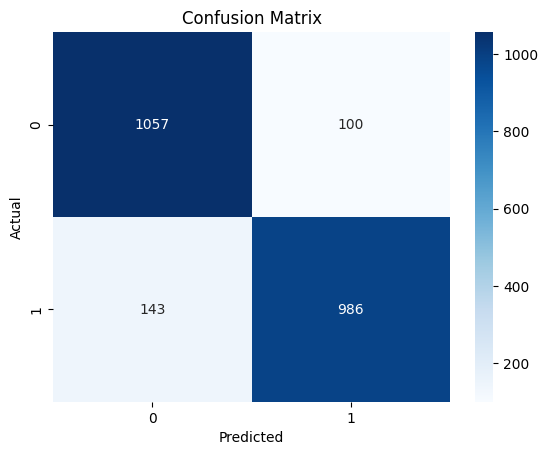

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
vectorizer = TfidfVectorizer()

df = pd.read_csv("/Users/celia/Downloads/dataset_phishing.csv")

X = df['url']
X = vectorizer.fit_transform(df['url']) ## Convert 'url' column to numeric values

# Convert 'status' column to numeric values
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})
y = df['status']

## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## Standard Metrics for Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

## Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
import pickle

# Save to file in the current working directory
pkl_filename = "/Users/celia/Downloads/phishing_classifier.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)

vectorizer_filename = "/Users/celia/Downloads/phishing_vectorizer.pkl"
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)